# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Rizal Nur Arbaatun - 1301210044
2. Galih Akbar Nugraha - 1301213060
3. Muhammad Abiya Makruf - 1301213157

#### Latar Belakang
Silahkan double click cell ini dan tulis latar belakang!

## Eksplorasi Data

### Load Dataset

In [6]:
#Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import KFold

# Styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)



In [7]:
import os
os.listdir("content")

['student-por.csv', 'student-mat.csv']

In [8]:
#Read dataset student-pro.csv or student-mat.csv

df = pd.read_csv('content/student-por.csv',sep=";")
#df = pd.read_csv('/content/student-mat.csv',sep=";")

### Analisis Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


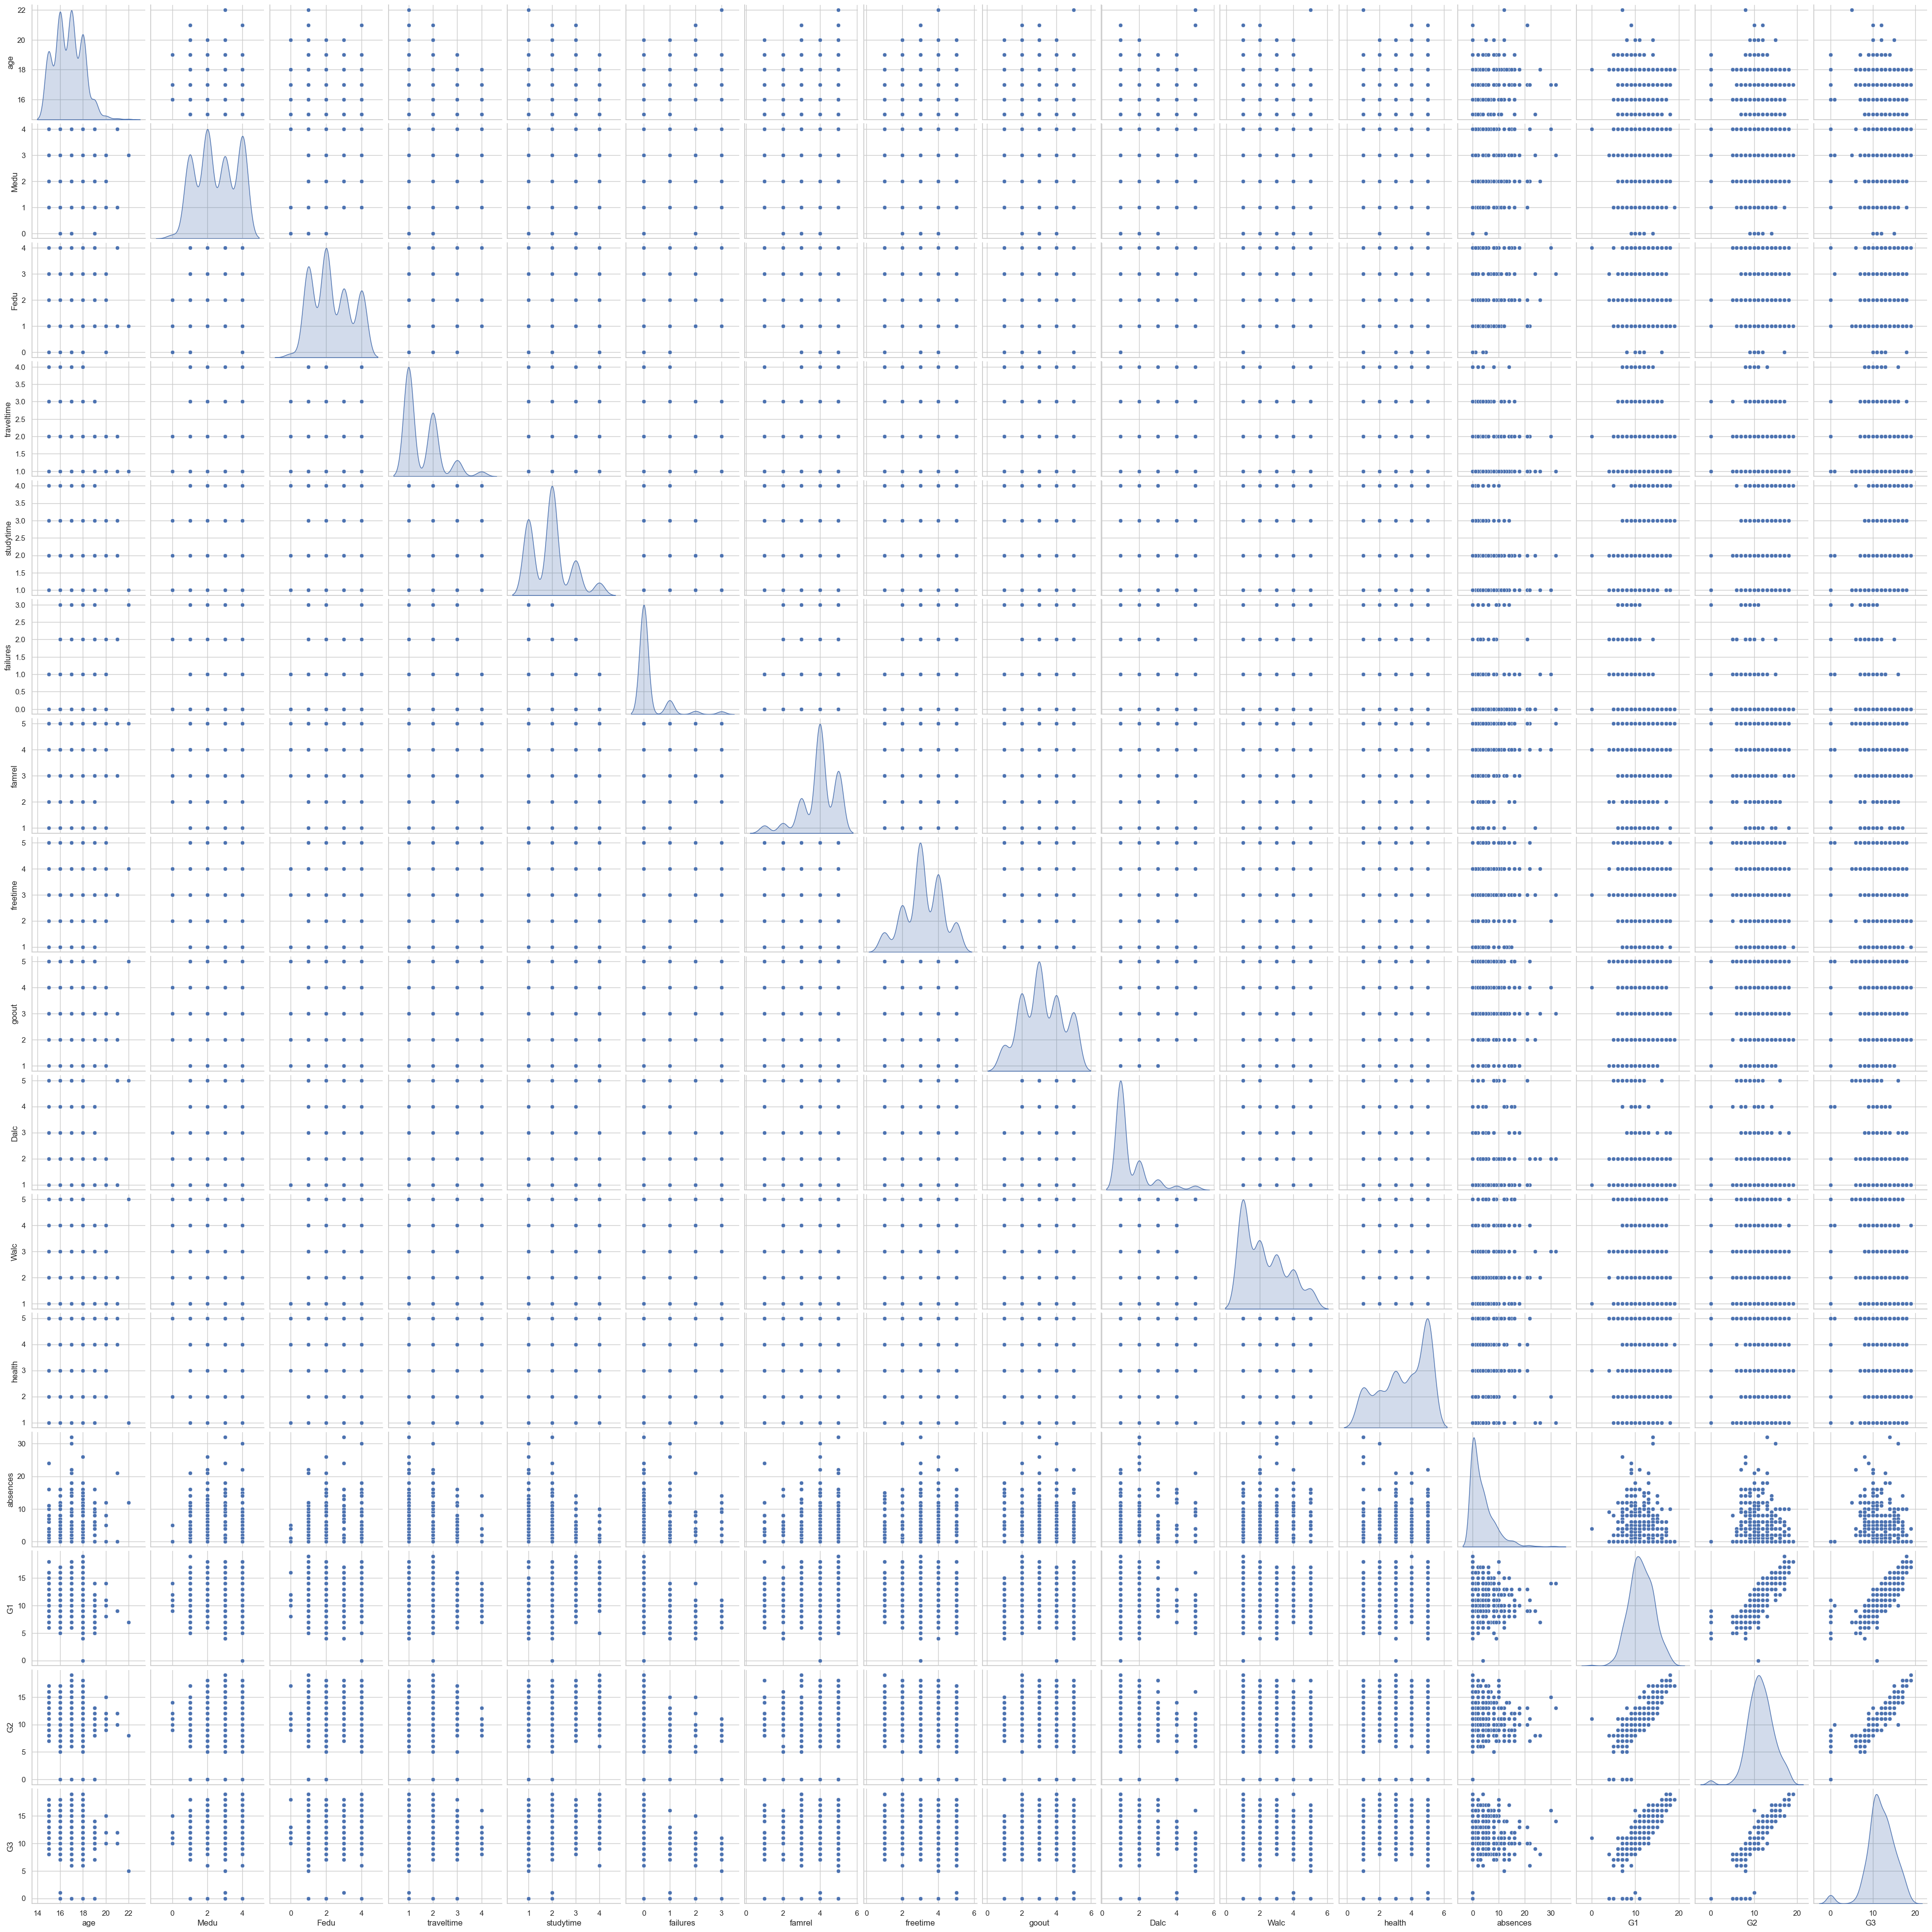

In [12]:
sns.pairplot(df, diag_kind='kde')

In [13]:
# plt.figure(figsize=(20, 15))
# sns.heatmap(df.corr(), linewidths=0.01,
#             square=True,annot=True,cmap="Blues")

In [14]:
# df.corr()['G3'].plot(kind='bar')
# plt.xlabel("Feature")
# plt.ylabel("Nilai Korelasi")
# plt.title("Korelasi Strength dengan Feature Lainnya")
# plt.show()

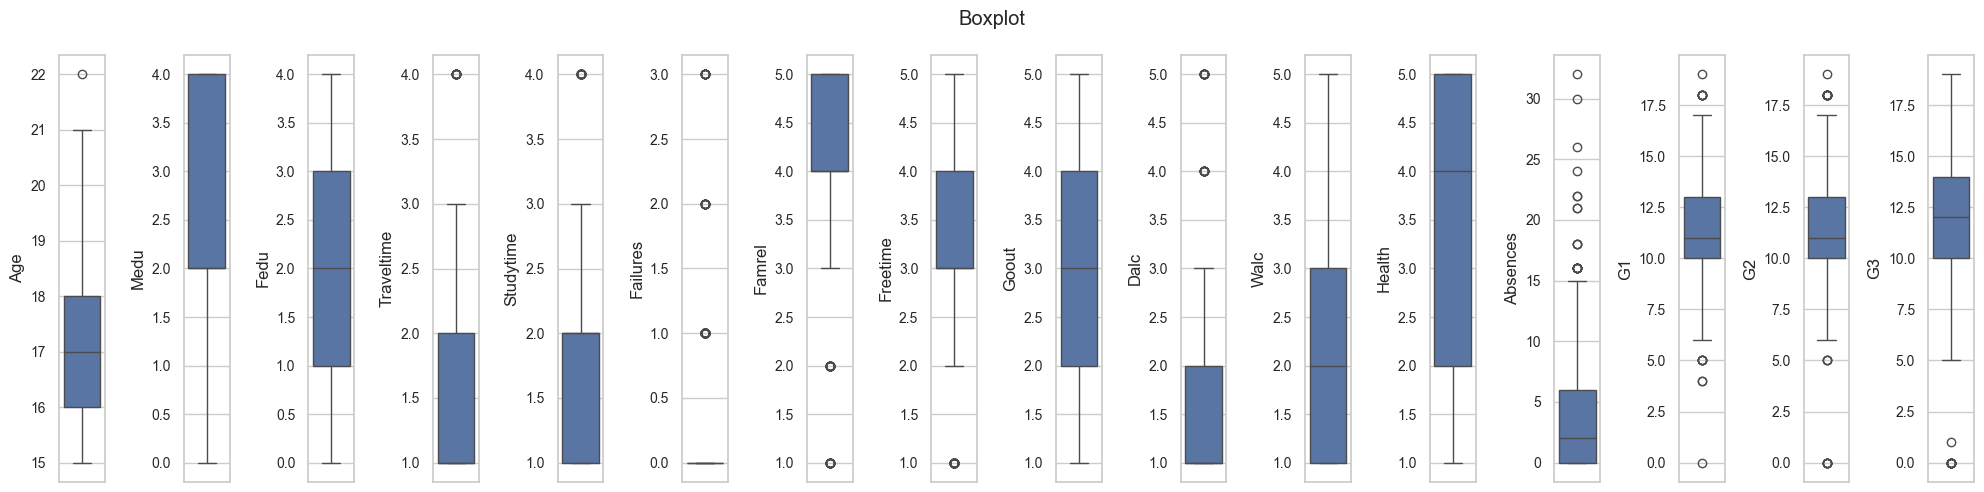

====== age ======
Upper outlier :  0.154 %
Lower outlier :  0.0 %
====== Medu ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
====== Fedu ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
====== traveltime ======
Upper outlier :  2.465 %
Lower outlier :  0.0 %
====== studytime ======
Upper outlier :  5.393 %
Lower outlier :  0.0 %
====== failures ======
Upper outlier :  15.408 %
Lower outlier :  0.0 %
====== famrel ======
Upper outlier :  0.0 %
Lower outlier :  7.858 %
====== freetime ======
Upper outlier :  0.0 %
Lower outlier :  6.934 %
====== goout ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
====== Dalc ======
Upper outlier :  5.239 %
Lower outlier :  0.0 %
====== Walc ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
====== health ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
====== absences ======
Upper outlier :  3.236 %
Lower outlier :  0.0 %
====== G1 ======
Upper outlier :  1.233 %
Lower outlier :  1.233 %
====== G2 ======
Upper outlier :  2.311 %
Lo

In [15]:
#Box plot hanya bisa digunakan untuk data numeric
noObject = df.copy()
noObject = noObject.drop([i for i in noObject.columns if noObject[i].dtype == 'object'],axis=1)


#Membuat box plot
fig, axes = plt.subplots(1, 16, figsize=(20,5))

for i, col in enumerate(noObject.columns) :
    sns.boxplot(y=col, data=noObject, ax = axes[i])
    axes[i].set_ylabel(col.title())
    axes[i].tick_params(labelsize=10)


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#Persentase outlier
for col in noObject.columns :
    q1 = noObject[col].quantile(q=0.25)
    q3 = noObject[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)
    upperPercentage = noObject[noObject[col] > upperOutlier][col].count()*100/len(noObject)
    lowerPercentage = noObject[noObject[col] < lowerOutlier][col].count()*100/len(noObject)

    print("======", col, "======")
    print("Upper outlier : ", round(upperPercentage, 3), "%")
    print("Lower outlier : ", round(lowerPercentage, 3), "%")

### Procesing Data

In [16]:
# Data Preprocessing
data = df.copy()


In [17]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [18]:
#Show Tipe data colom
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [19]:
#Show unique value
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(unique_values)


Column: school
['GP' 'MS']
Column: sex
['F' 'M']
Column: age
[18 17 15 16 19 22 20 21]
Column: address
['U' 'R']
Column: famsize
['GT3' 'LE3']
Column: Pstatus
['A' 'T']
Column: Medu
[4 1 3 2 0]
Column: Fedu
[4 1 2 3 0]
Column: Mjob
['at_home' 'health' 'other' 'services' 'teacher']
Column: Fjob
['teacher' 'other' 'services' 'health' 'at_home']
Column: reason
['course' 'other' 'home' 'reputation']
Column: guardian
['mother' 'father' 'other']
Column: traveltime
[2 1 3 4]
Column: studytime
[2 3 1 4]
Column: failures
[0 3 1 2]
Column: schoolsup
['yes' 'no']
Column: famsup
['no' 'yes']
Column: paid
['no' 'yes']
Column: activities
['no' 'yes']
Column: nursery
['yes' 'no']
Column: higher
['yes' 'no']
Column: internet
['no' 'yes']
Column: romantic
['no' 'yes']
Column: famrel
[4 5 3 1 2]
Column: freetime
[3 2 4 1 5]
Column: goout
[4 3 2 1 5]
Column: Dalc
[1 2 5 3 4]
Column: Walc
[1 3 2 4 5]
Column: health
[3 5 1 2 4]
Column: absences
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 1

In [20]:
#Binary encoding
data['school'] = data['school'].replace({'GP': 0, 'MS': 1})

data['sex'] = data['sex'].replace({'F': 0, 'M': 1})

data['address'] = data['address'].replace({'U': 0, 'R': 1})

data['famsize'] = data['famsize'].replace({'LE3': 0, 'GT3': 1})

data['Pstatus'] = data['Pstatus'].replace({'T': 0, 'A': 1})

data['schoolsup'] = data['schoolsup'].replace({'no': 0, 'yes': 1})

data['famsup'] = data['famsup'].replace({'no': 0, 'yes': 1})

data['paid'] = data['paid'].replace({'no': 0, 'yes': 1})

data['activities'] = data['activities'].replace({'no': 0, 'yes': 1})

data['nursery'] = data['nursery'].replace({'no': 0, 'yes': 1})

data['higher'] = data['higher'].replace({'no': 0, 'yes': 1})

data['internet'] = data['internet'].replace({'no': 0, 'yes': 1})

data['romantic'] = data['romantic'].replace({'no': 0, 'yes': 1})


In [21]:
#One hot encoding
data = pd.get_dummies(data, columns = ['Mjob', 'Fjob','reason','guardian'])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,...,False,False,True,True,False,False,False,False,True,False
1,0,0,17,0,1,0,1,1,1,2,...,True,False,False,True,False,False,False,True,False,False
2,0,0,15,0,0,0,1,1,1,2,...,True,False,False,False,False,True,False,False,True,False
3,0,0,15,0,1,0,4,2,1,3,...,False,True,False,False,True,False,False,False,True,False
4,0,0,16,0,1,0,3,3,1,2,...,True,False,False,False,True,False,False,True,False,False


In [22]:
#Show unique value
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(unique_values)


Column: school
[0 1]
Column: sex
[0 1]
Column: age
[18 17 15 16 19 22 20 21]
Column: address
[0 1]
Column: famsize
[1 0]
Column: Pstatus
[1 0]
Column: Medu
[4 1 3 2 0]
Column: Fedu
[4 1 2 3 0]
Column: traveltime
[2 1 3 4]
Column: studytime
[2 3 1 4]
Column: failures
[0 3 1 2]
Column: schoolsup
[1 0]
Column: famsup
[0 1]
Column: paid
[0 1]
Column: activities
[0 1]
Column: nursery
[1 0]
Column: higher
[1 0]
Column: internet
[0 1]
Column: romantic
[0 1]
Column: famrel
[4 5 3 1 2]
Column: freetime
[3 2 4 1 5]
Column: goout
[4 3 2 1 5]
Column: Dalc
[1 2 5 3 4]
Column: Walc
[1 3 2 4 5]
Column: health
[3 5 1 2 4]
Column: absences
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
Column: G1
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
Column: G2
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
Column: G3
[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
Column: Mjob_at_home
[ True False]
Column: Mjob_health
[False  True]
Column: Mjob_other
[False  True]
Colu

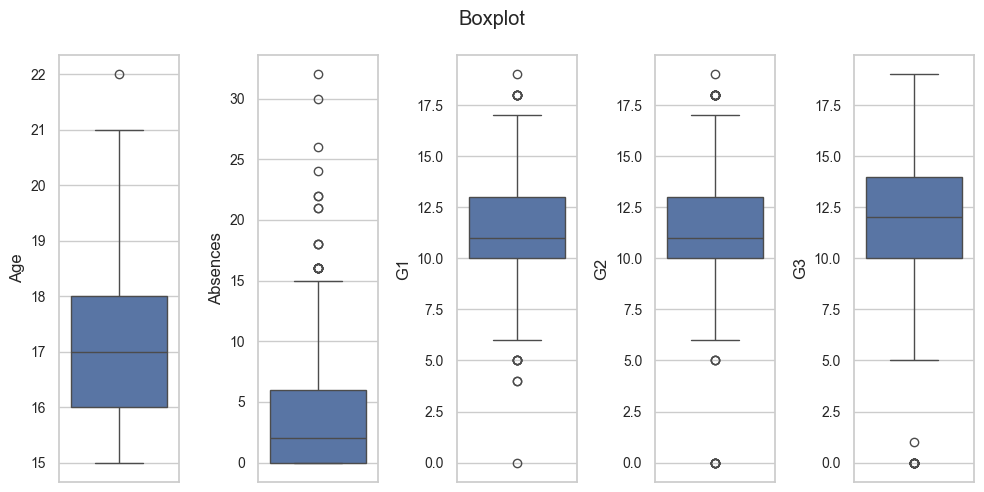


<class 'str'>
====== age ======
Upper outlier :  0.154 %
Lower outlier :  0.0 %
<class 'str'>
====== absences ======
Upper outlier :  3.236 %
Lower outlier :  0.0 %
<class 'str'>
====== G1 ======
Upper outlier :  1.233 %
Lower outlier :  1.233 %
<class 'str'>
====== G2 ======
Upper outlier :  2.311 %
Lower outlier :  1.541 %
<class 'str'>
====== G3 ======
Upper outlier :  0.0 %
Lower outlier :  2.465 %


In [23]:
#box plot
#Membuat box plot
fig, axes = plt.subplots(1, 5, figsize=(10,5))

objectNumeric = [i for i in data.columns if i == 'age' or i == 'absences' or i=='G1' or i =='G2' or i=='G3' ]
for i, col in enumerate(objectNumeric) :
    sns.boxplot(y=col, data=noObject, ax = axes[i])
    axes[i].set_ylabel(col.title())
    axes[i].tick_params(labelsize=10)


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

print()
#Persentase outlier
for col in objectNumeric :
    print(type(col))
    q1 = noObject[col].quantile(q=0.25)
    q3 = noObject[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)
    upperPercentage = noObject[noObject[col] > upperOutlier][col].count()*100/len(noObject)
    lowerPercentage = noObject[noObject[col] < lowerOutlier][col].count()*100/len(noObject)

    print("======", col, "======")
    print("Upper outlier : ", round(upperPercentage, 3), "%")
    print("Lower outlier : ", round(lowerPercentage, 3), "%")



In [24]:
data = data*1

In [25]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,1,0,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,0,0,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,1,0,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,1,0,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,1,0,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
645,1,0,18,0,0,0,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
646,1,0,18,0,1,0,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
647,1,1,17,0,0,0,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


In [28]:
#Handle outlier
def replace_oulier(data):
  data = data.copy()
  for col in data.columns :
    q1 = data[col].quantile(q=0.25)
    q3 = data[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)

    data.loc[data[col] > upperOutlier, col] = upperOutlier
    data.loc[data[col] < lowerOutlier, col] = lowerOutlier

  return data

ro = replace_oulier(data)


/var/folders/4z/576y5mt13qdbksdj_8qndh3w0000gn/T/ipykernel_36390/2358831350.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] > upperOutlier, col] = upperOutlier
/var/folders/4z/576y5mt13qdbksdj_8qndh3w0000gn/T/ipykernel_36390/2358831350.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] > upperOutlier, col] = upperOutlier
/var/folders/4z/576y5mt13qdbksdj_8qndh3w0000gn/T/ipykernel_36390/2358831350.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.

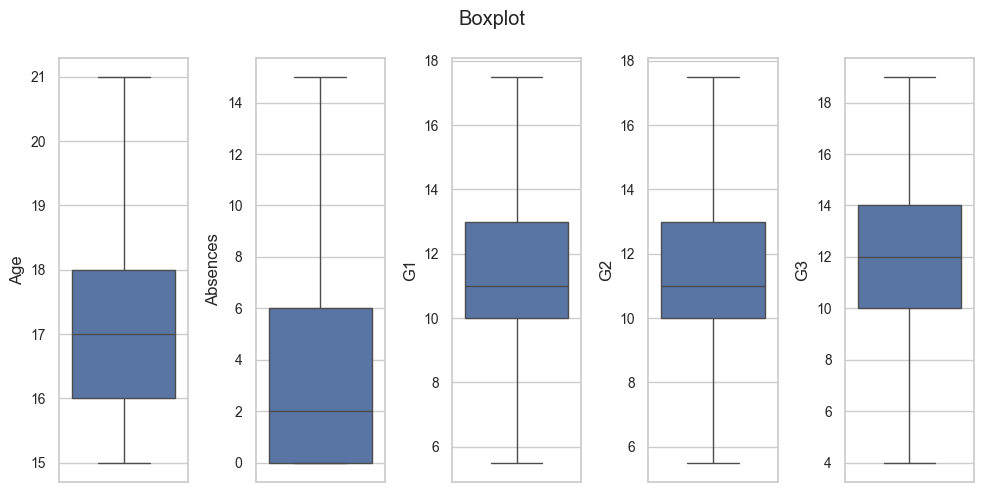


<class 'str'>
====== age ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
<class 'str'>
====== absences ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
<class 'str'>
====== G1 ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
<class 'str'>
====== G2 ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
<class 'str'>
====== G3 ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %


In [29]:
#box plot
#persen box plot

#box plot
#Membuat box plot
fig, axes = plt.subplots(1, 5, figsize=(10,5))

objectNumeric = [i for i in ro.columns if i == 'age' or i == 'absences' or i=='G1' or i =='G2' or i=='G3' ]
for i, col in enumerate(objectNumeric) :
    sns.boxplot(y=col, data=ro, ax = axes[i])
    axes[i].set_ylabel(col.title())
    axes[i].tick_params(labelsize=10)


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

print()
#Persentase outlier
for col in objectNumeric :
    print(type(col))
    q1 = ro[col].quantile(q=0.25)
    q3 = ro[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)
    upperPercentage = ro[ro[col] > upperOutlier][col].count()*100/len(ro)
    lowerPercentage = ro[ro[col] < lowerOutlier][col].count()*100/len(ro)

    print("======", col, "======")
    print("Upper outlier : ", round(upperPercentage, 3), "%")
    print("Lower outlier : ", round(lowerPercentage, 3), "%")



In [32]:
#setup X dan y
#G3 dipilih sebagai target
# x = data.drop('G3', axis=1)
x = data[['Medu', 'Fedu', 'studytime', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'G1', 'G2', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_teacher','reason_home', 'reason_reputation', 'guardian_father']]
y = data[['G3']]

In [30]:
# #setup X dan y
# #G3 dipilih sebagai target
# x = data.drop('G3', axis=1)
# y = data[['G3']]

array([[<Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'famsup'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>],
       [<Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'Mjob_health'}>],
       [<Axes: title={'center': 'Mjob_services'}>,
        <Axes: title={'center': 'Mjob_teacher'}>,
        <Axes: title={'center': 'Fjob_health'}>,
        <Axes: title={'center': 'Fjob_teacher'}>],
       [<Axes: title={'center': 'reason_home'}>,
        <Axes: title={'center': 'reason_reputation'}>,
        <Axes: title={'center': 'guardian_father'}>, <Axes: >]],
      dtype=object)

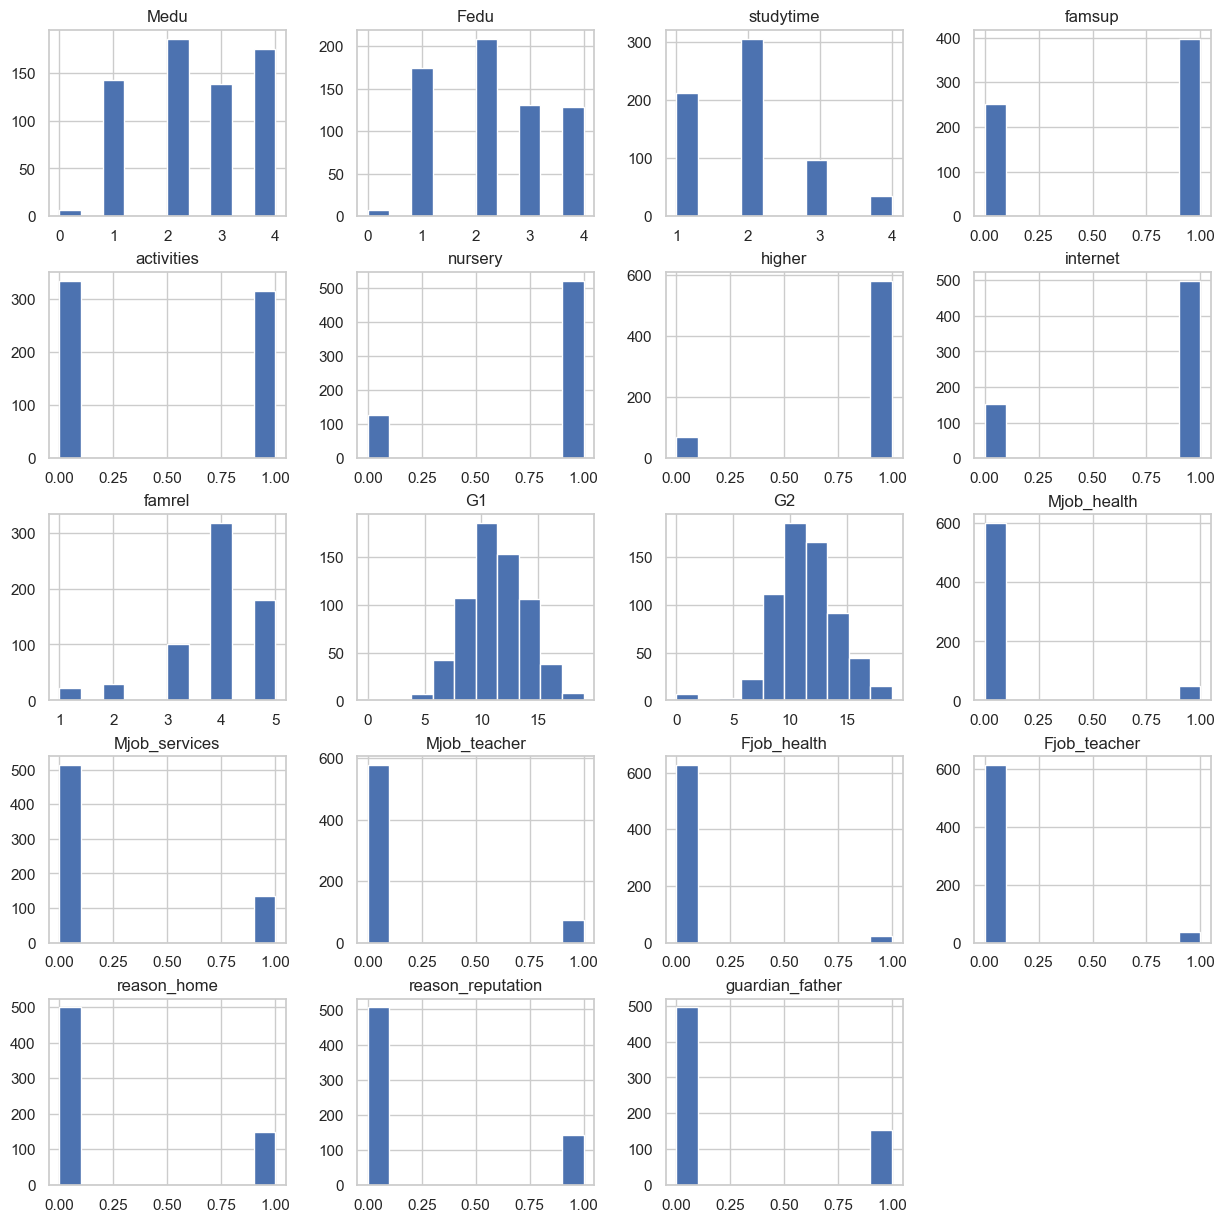

In [33]:
#Histogram sebelum normalisasi
x.hist(figsize=(15,15))


In [34]:
def minMaxScaler(df) :
    scaledDf = df.copy()

    for col in df.columns :
        unique_values = df[col].unique()
        print(f"colum: {col}, length: {len(unique_values)}")
        if len(unique_values) > 2:
          minVal = df[col].min()
          maxVal = df[col].max()
          scaledDf[col] = (df[col] - minVal) / (maxVal - minVal)

    return scaledDf

colum: Medu, length: 5
colum: Fedu, length: 5
colum: studytime, length: 4
colum: famsup, length: 2
colum: activities, length: 2
colum: nursery, length: 2
colum: higher, length: 2
colum: internet, length: 2
colum: famrel, length: 5
colum: G1, length: 17
colum: G2, length: 16
colum: Mjob_health, length: 2
colum: Mjob_services, length: 2
colum: Mjob_teacher, length: 2
colum: Fjob_health, length: 2
colum: Fjob_teacher, length: 2
colum: reason_home, length: 2
colum: reason_reputation, length: 2
colum: guardian_father, length: 2


array([[<Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'famsup'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>],
       [<Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'Mjob_health'}>],
       [<Axes: title={'center': 'Mjob_services'}>,
        <Axes: title={'center': 'Mjob_teacher'}>,
        <Axes: title={'center': 'Fjob_health'}>,
        <Axes: title={'center': 'Fjob_teacher'}>],
       [<Axes: title={'center': 'reason_home'}>,
        <Axes: title={'center': 'reason_reputation'}>,
        <Axes: title={'center': 'guardian_father'}>, <Axes: >]],
      dtype=object)

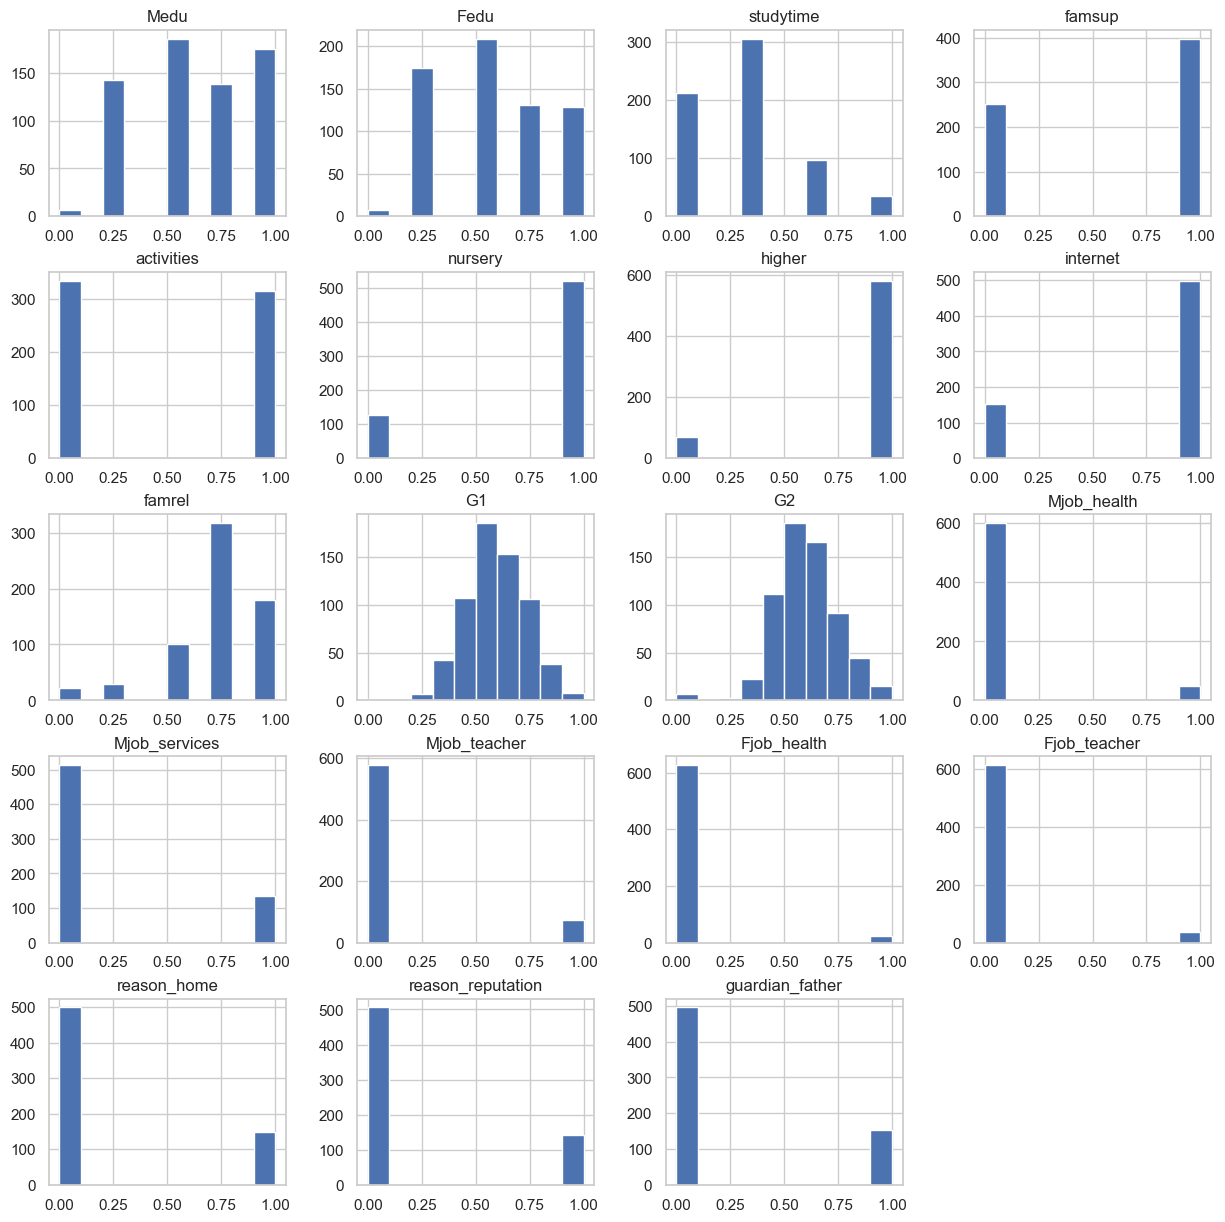

In [35]:
#Sesudah normalisasi
#Normalisasi hanya dilakukan terhadap kolom yang range nilai tidak 0-1
x = minMaxScaler(x)
x.hist(figsize=(15,15))

## Eksplorasi Code

In [36]:
#split data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
#compile model
def trainModel(train, epoch, optimizer='Adam', loss='mean_squared_error') :
    model.compile(optimizer=optimizer, loss=loss)

    history = model.fit(train[0].values, train[1].values, epochs=epoch, validation_data=(train[2].values, train[3].values))
    return history

#### Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

In [38]:
# Baseline Model
# Write your code here
#Bikin baseline + jalanin
model = tf.keras.models.Sequential ([
    tf.keras.layers.Dense(83, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear'),
])

history = trainModel([xTrain, yTrain, xTest, yTest], 50)


Epoch 1/50
17/17 [==============================] - 0s 5ms/step - loss: 116.8311 - val_loss: 104.8954
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 94.3198 - val_loss: 85.5585
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 78.7541 - val_loss: 73.3501
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 69.1883 - val_loss: 65.6379
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 62.9343 - val_loss: 60.3135
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 58.3870 - val_loss: 56.2009
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 54.7609 - val_loss: 52.7359
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 51.6360 - val_loss: 49.6531
Epoch 9/50
17/17 [==============================] - 0s 2ms/step - loss: 48.8346 - val_loss: 46.8760
Epoch 10/50
17/17 [==============================] - 0s 2ms/step - loss: 46.2919 - val_loss: 44.33

5/5 [==============================] - 0s 692us/step


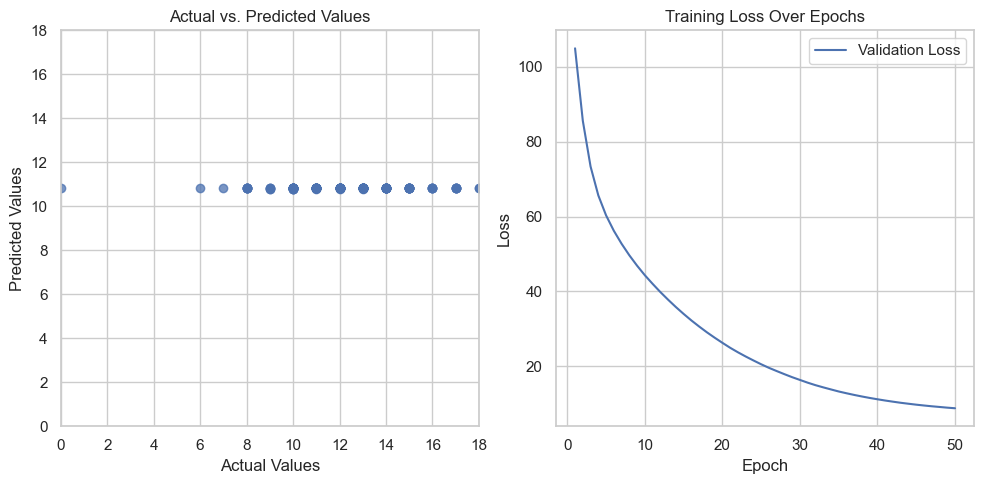

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

yPred = model.predict(xTest.values)

axes[0].scatter(yTest.values, yPred, alpha=0.75)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs. Predicted Values')
axes[0].set_ylim(min(yTest.values), max(yTest.values))
axes[0].set_xlim(min(yTest.values), max(yTest.values))

# Extract the loss values from the training history
loss = history.history['val_loss']

# Create a list of epoch numbers (1 to the number of epochs)
epochs = range(1, len(loss) + 1)

# Plot the loss over epochs
axes[1].plot(epochs, loss, label='Validation Loss')
axes[1].set_title('Training Loss Over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


Epoch 1/50
17/17 [==============================] - 0s 4ms/step - loss: 150.1452 - val_loss: 149.5964
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 144.3211 - val_loss: 143.6942
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 138.5968 - val_loss: 137.8666
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 132.9315 - val_loss: 132.0948
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 127.2413 - val_loss: 126.2123
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 121.4677 - val_loss: 120.2057
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 115.5966 - val_loss: 114.0734
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 109.5632 - val_loss: 107.8424
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 103.5027 - val_loss: 101.6049
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 97.4522 -

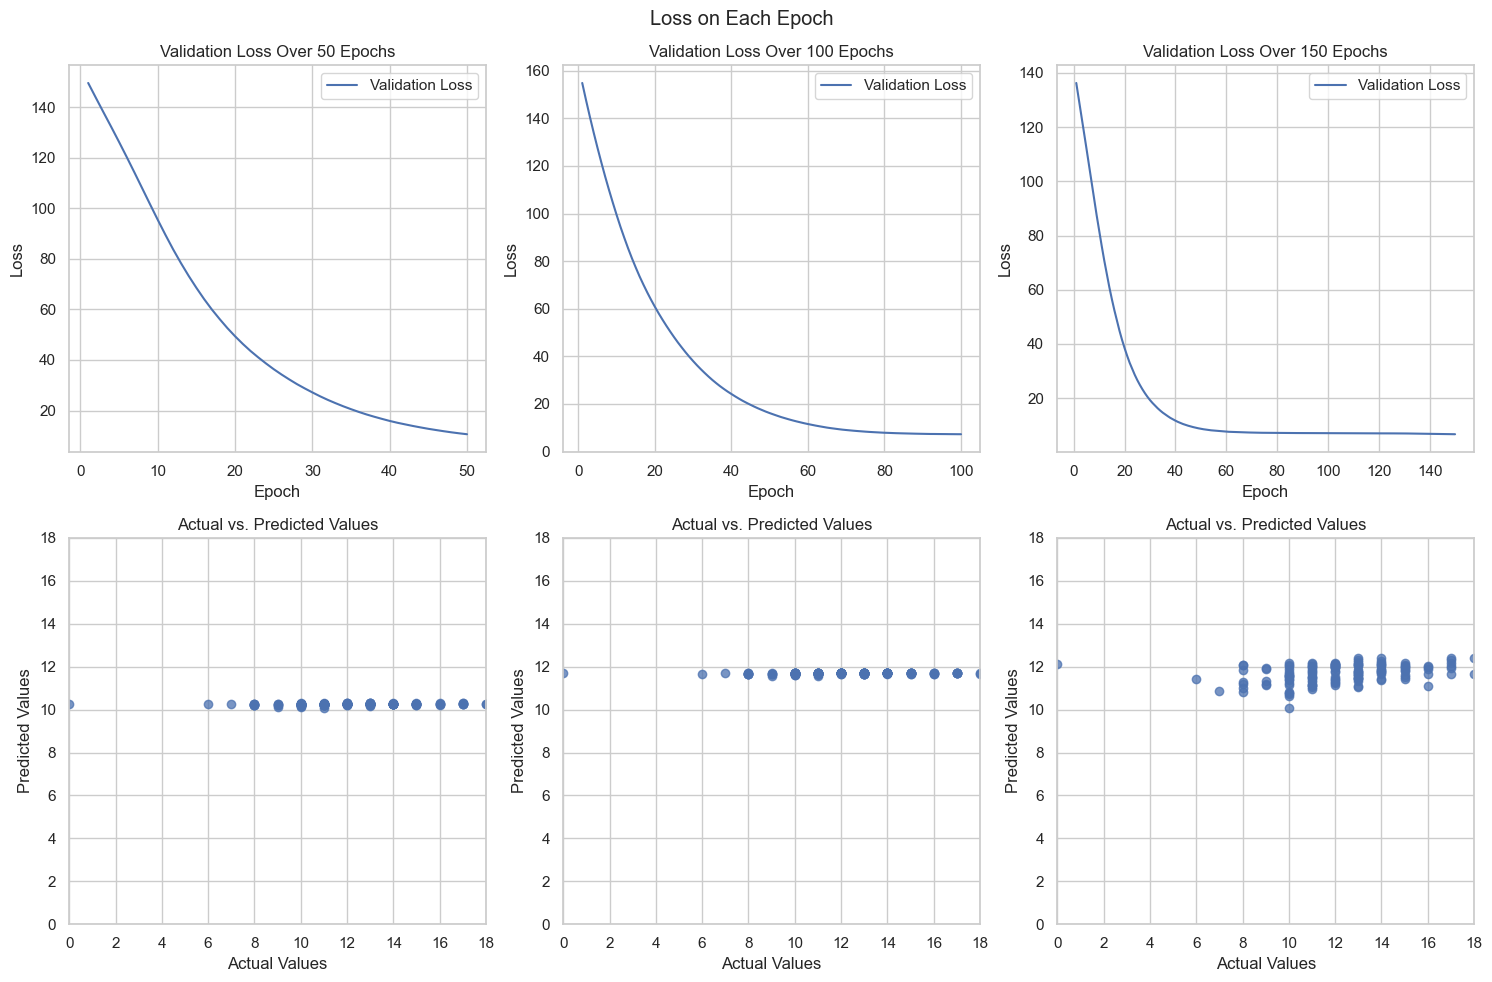

In [41]:
#Mencari epoch
nEpochs = [50, 100, 150]

fig, axes = plt.subplots(2, len(nEpochs), figsize=(15,10))

for i, epoch in enumerate(nEpochs) :
    model = tf.keras.models.Sequential ([
        tf.keras.layers.Dense(8, activation='sigmoid'),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='linear'),
    ])

    history = trainModel([xTrain, yTrain, xTest, yTest], epoch)

    # Extract the loss values from the training history
    loss = history.history['val_loss']

    # Create a list of epoch numbers (1 to the number of epochs)
    epochs = range(1, len(loss) + 1)

    # Plot the loss over epochs
    axes[0][i].plot(epochs, loss, label='Validation Loss')
    axes[0][i].set_title(f'Validation Loss Over {epoch} Epochs')
    axes[0][i].set_xlabel('Epoch')
    axes[0][i].set_ylabel('Loss')

    axes[0][i].legend()

    yPred = model.predict(xTest.values)

    axes[1][i].scatter(yTest.values, yPred, alpha=0.75)
    axes[1][i].set_xlabel('Actual Values')
    axes[1][i].set_ylabel('Predicted Values')
    axes[1][i].set_title('Actual vs. Predicted Values')
    axes[1][i].set_ylim(min(yTest.values), max(yTest.values))
    axes[1][i].set_xlim(min(yTest.values), max(yTest.values))

plt.suptitle('Loss on Each Epoch')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [43]:
len(x.columns)

19

In [ ]:
# Model Exploration (at least 3 scheme)
# Write your code here
activationFunction = ["sigmoid", "relu", "tanh"]
nLayers = [1, 2]
nNodes = [16, 32, 64]

feature_count = len(x.columns)
epochs = 60

#Membuat 3 model

models = []
for activation in activationFunction :
    for layer in nLayers :
        for node in nNodes :

            modelData = {
                "name" : "",
                "layer" : [],
                "loss" : [],
                "model" : '',
                "history" : ''
            }
            lossArr = []

            for iTrain, iTest in kf.split(x) :
                layerData = []
                model = tf.keras.models.Sequential ([])

                model.add(tf.keras.layers.Dense(feature_count, activation=activation))
                layerData.append({
                    "num" : 0,
                    "node" : feature_count,
                    "activation" : activation
                })
                for i in range(layer) :
                    model.add(tf.keras.layers.Dense(node, activation=activation))
                    layerData.append({
                        "num" : i+1,
                        "node" : node,
                        "activation" : activation
                    })
                model.add(tf.keras.layers.Dense(1, activation='linear'))
                layerData.append({
                    "num" : layer+1,
                    "node" : 1,
                    "activation" : "linear"
                })

                xTrain = x.iloc[iTrain]
                yTrain = y.iloc[iTrain]
                xTest = x.iloc[iTest]
                yTest = y.iloc[iTest]

                history = trainModel([xTrain, yTrain, xTest, yTest], epoch)

                valScore = model.evaluate(xTest.values, yTest.values)

                modelData["loss"].append(valScore)

            modelData["name"] = f"model_{activation}_{layer}_{node}"
            modelData["layer"] = layerData
            modelData["model"] = model
            modelData["history"] = history

            models.append(modelData)

Epoch 1/75
17/17 [==============================] - 0s 4ms/step - loss: 118.1163 - val_loss: 104.6067
Epoch 2/75
17/17 [==============================] - 0s 2ms/step - loss: 93.8984 - val_loss: 85.3966
Epoch 3/75
17/17 [==============================] - 0s 2ms/step - loss: 79.4052 - val_loss: 74.7918
Epoch 4/75
17/17 [==============================] - 0s 2ms/step - loss: 71.2362 - val_loss: 68.4845
Epoch 5/75
17/17 [==============================] - 0s 2ms/step - loss: 66.1207 - val_loss: 63.9510
Epoch 6/75
17/17 [==============================] - 0s 2ms/step - loss: 62.1502 - val_loss: 60.2691
Epoch 7/75
17/17 [==============================] - 0s 2ms/step - loss: 58.8254 - val_loss: 57.0176
Epoch 8/75
17/17 [==============================] - 0s 2ms/step - loss: 55.8474 - val_loss: 54.0332
Epoch 9/75
17/17 [==============================] - 0s 2ms/step - loss: 53.0670 - val_loss: 51.2781
Epoch 10/75
17/17 [==============================] - 0s 2ms/step - loss: 50.5168 - val_loss: 48.67

In [ ]:
resultDf = pd.DataFrame({
    "model_name" : [m["name"] for m in models],
    "activation_func" : [m["name"].split('_')[1] for m in models],
    "layer_1" : [m["layer"][1]["node"] for m in models],
    "layer_2" : [m["layer"][2]["node"] if len(m["layer"])>3 else "-" for m in models],
    "avg_loss" : [round(np.mean(m["loss"]), 2) for m in models],
    "delta_loss" : [round(max(m["loss"]) - min(m["loss"]), 2) for m in models]
})

resultDf.sort_values(by='avg_loss')

,model_name,activation_func,layer_1,layer_2,avg_loss,delta_loss
14,model_tanh_1_64,tanh,64,-,2.67,3.40
17,model_tanh_2_64,tanh,64,64,2.82,2.84
6,model_relu_1_16,relu,16,-,3.31,3.50
16,model_tanh_2_32,tanh,32,32,3.40,4.02
8,model_relu_1_64,relu,64,-,3.61,2.88
9,model_relu_2_16,relu,16,16,3.67,3.22
10,model_relu_2_32,relu,32,32,3.73,4.28
13,model_tanh_1_32,tanh,32,-,3.74,6.33
7,model_relu_1_32,relu,32,-,3.81,3.75
11,model_relu_2_64,relu,64,64,4.42,3.82


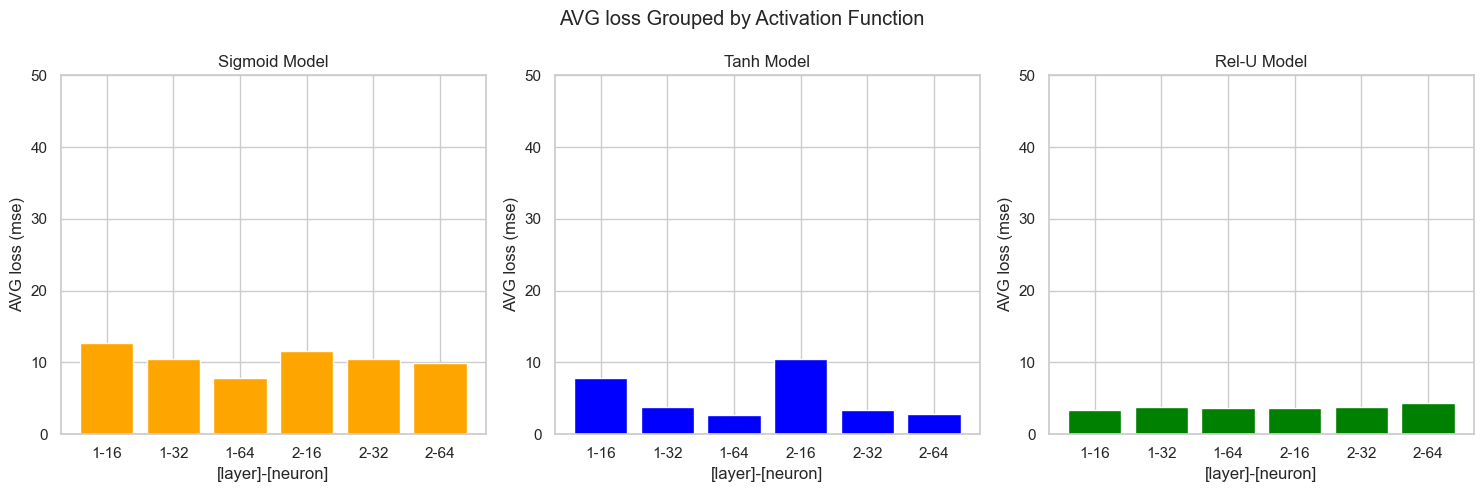

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "sigmoid"]
axes[0].bar(x, [m[4] for m in resultDf.values if m[1] == "sigmoid"], label="sigmoid", color='orange')
axes[0].set_ylim(0, 50)
axes[0].set_title("Sigmoid Model")
axes[0].set_xlabel("[layer]-[neuron]")
axes[0].set_ylabel("AVG loss (mse)")

x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "tanh"]
axes[1].bar(x, [m[4] for m in resultDf.values if m[1] == "tanh"], label="tanh", color='blue')
axes[1].set_ylim(0, 50)
axes[1].set_title("Tanh Model")
axes[1].set_xlabel("[layer]-[neuron]")
axes[1].set_ylabel("AVG loss (mse)")


x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "relu"]
axes[2].bar(x, [m[4] for m in resultDf.values if m[1] == "relu"], label="relu", color='green')
axes[2].set_ylim(0, 50)
axes[2].set_title("Rel-U Model")
axes[2].set_xlabel("[layer]-[neuron]")
axes[2].set_ylabel("AVG loss (mse)")

plt.suptitle("AVG loss Grouped by Activation Function")
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation
# Write your code here
lowestMSE = min([np.mean(m["loss"]) for m in models ])
bestModel = [m for m in models if np.mean(m["loss"]) == lowestMSE][0]
bestModel
#Hasil akhir

{'name': 'model_tanh_1_64',
 'layer': [{'num': 0, 'node': 83, 'activation': 'tanh'},
  {'num': 1, 'node': 64, 'activation': 'tanh'},
  {'num': 2, 'node': 1, 'activation': 'linear'}],
 'loss': [1.2269788980484009,
  4.624709606170654,
  2.913196563720703,
  2.168337345123291,
  2.3983774185180664],
 'model': <keras.src.engine.sequential.Sequential at 0x305f80b50>,
 'history': <keras.src.callbacks.History at 0x308c6a8d0>}

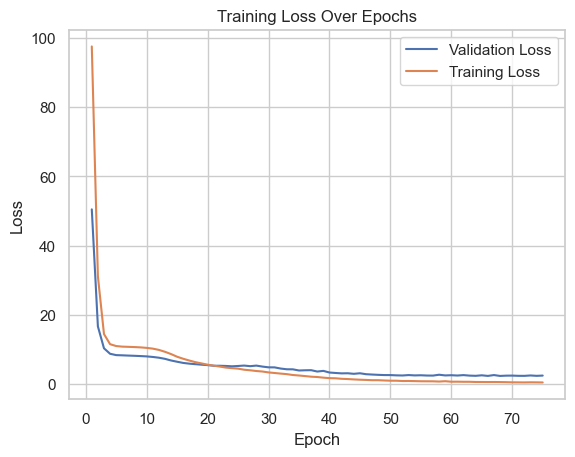

In [ ]:
history = bestModel['history']

# Extract the loss values from the training history
valLoss = history.history['val_loss']
loss = history.history['loss']

# Create a list of epoch numbers (1 to the number of epochs)
epochs = range(1, len(loss) + 1)
# Plot the loss over epochs
plt.plot(epochs, valLoss, label='Validation Loss')
plt.plot(epochs, loss, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

5/5 [==============================] - 0s 818us/step


(0.0, 18.0)

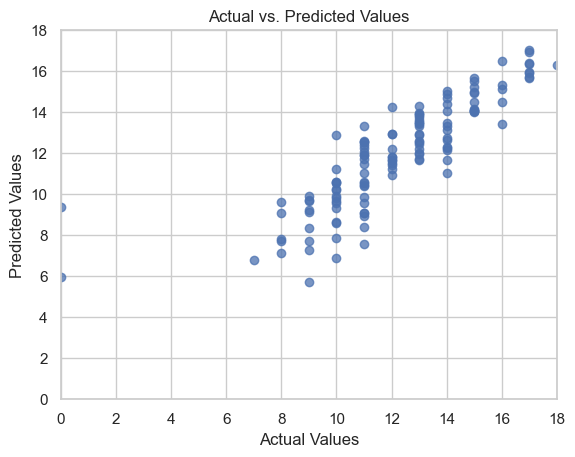

In [ ]:
yPred = bestModel['model'].predict(xTest.values)

plt.scatter(yTest.values, yPred, alpha=0.75)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.ylim(min(yTest.values), max(yTest.values))
plt.xlim(min(yTest.values), max(yTest.values))

#### Hasil dan Analisis
Silahkan double click cell ini dan tulis hasil dan analisis!

#### Kesimpulan
Silahkan double click cell ini dan tulis kesimpulan!